In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import feature_column
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
# Fetch the data and convert to dataset
def df_to_ds(df,shuffle=True,batch_size=32):
    df = df.copy()
    target = df.pop('mpg')
    ds = tf.data.Dataset.from_tensor_slices((dict(df),target))
    if shuffle:
        ds = ds.shuffle(buffer_size=96)
    return ds.batch(batch_size)

path = keras.utils.get_file('auto-mpg.data',
                            "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
columns = ['mpg','cylinders','disp','hp','weight','acc','model_year','origin']
df = pd.read_csv(path,sep=' ',skipinitialspace=True,na_values='?',
                names=columns,comment='\t')
df.dropna(inplace=True)
print(df.shape)

df_train,df_test = train_test_split(df,test_size=0.2)
ds_train = df_to_ds(df_train)
ds_test = df_to_ds(df_test,shuffle=False)

df.head()


(392, 8)


,mpg,cylinders,disp,hp,weight,acc,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
# Create features
features=[]
for column in ['cylinders','disp','hp','acc']:
    features.append(feature_column.numeric_column(column))
features.append(feature_column.indicator_column(
    feature_column.categorical_column_with_vocabulary_list(
        'model_year',list(df.model_year.unique()))))
features.append(feature_column.indicator_column(
    feature_column.categorical_column_with_vocabulary_list(
        'origin',list(df.origin.unique()))))

In [4]:
# Build the model
def build_model():
    model = keras.models.Sequential([
        keras.layers.DenseFeatures(features),
        keras.layers.Dense(75,activation='relu'),
        keras.layers.Dense(75,activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.RMSprop(0.001),
                 loss='mse',
                 metrics=['mae','mse'])
    return model

In [5]:
model = build_model()

In [6]:
history = model.fit(ds_train,validation_data=ds_test,epochs=500)

W0529 05:07:58.878720 140316820256512 deprecation.py:323] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2758: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0529 05:07:58.914695 140316820256512 deprecation.py:323] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/feature_column/feature_column_v2.py:3774: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0529 05:07:58.927284 140316820256512 deprecation.py:323] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/feature_column/feature_column_v2.py:4307: IndicatorColumn._variable_shape (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will b

Epoch 1/500
10/10 [==============================] - 0s 42ms/step - loss: 213.8564 - mae: 13.0215 - mse: 247.5974 - val_loss: 175.4620 - val_mae: 10.3962 - val_mse: 171.5481
Epoch 2/500
10/10 [==============================] - 0s 21ms/step - loss: 134.9338 - mae: 9.7941 - mse: 144.3914 - val_loss: 146.9589 - val_mae: 9.6585 - val_mse: 146.2357
Epoch 3/500
10/10 [==============================] - 0s 21ms/step - loss: 112.9318 - mae: 8.9177 - mse: 120.5909 - val_loss: 141.8317 - val_mae: 9.9720 - val_mse: 143.1639
Epoch 4/500
10/10 [==============================] - 0s 21ms/step - loss: 100.2614 - mae: 8.6376 - mse: 111.1332 - val_loss: 128.5347 - val_mae: 9.6810 - val_mse: 130.8196
Epoch 5/500
10/10 [==============================] - 0s 21ms/step - loss: 92.2355 - mae: 8.3374 - mse: 103.0387 - val_loss: 112.5076 - val_mae: 9.0780 - val_mse: 115.1372
Epoch 6/500
10/10 [==============================] - 0s 20ms/step - loss: 82.7000 - mae: 7.7703 - mse: 90.7582 - val_loss: 108.1139 - val_m

10/10 [==============================] - 0s 21ms/step - loss: 37.6031 - mae: 5.0235 - mse: 36.8537 - val_loss: 39.5401 - val_mae: 4.7620 - val_mse: 37.9873
Epoch 50/500
10/10 [==============================] - 0s 21ms/step - loss: 37.3743 - mae: 5.0103 - mse: 36.6136 - val_loss: 39.7501 - val_mae: 4.7830 - val_mse: 38.2140
Epoch 51/500
10/10 [==============================] - 0s 21ms/step - loss: 37.1387 - mae: 5.0203 - mse: 36.6590 - val_loss: 39.2245 - val_mae: 4.7496 - val_mse: 37.6442
Epoch 52/500
10/10 [==============================] - 0s 21ms/step - loss: 36.6849 - mae: 4.9875 - mse: 36.1891 - val_loss: 39.6174 - val_mae: 4.7906 - val_mse: 38.0458
Epoch 53/500
10/10 [==============================] - 0s 20ms/step - loss: 36.4150 - mae: 4.9849 - mse: 36.1252 - val_loss: 39.9321 - val_mae: 4.8292 - val_mse: 38.4127
Epoch 54/500
10/10 [==============================] - 0s 21ms/step - loss: 36.1738 - mae: 5.0009 - mse: 36.2903 - val_loss: 39.5059 - val_mae: 4.7951 - val_mse: 37.9537

10/10 [==============================] - 0s 21ms/step - loss: 25.9540 - mae: 4.4683 - mse: 29.2559 - val_loss: 29.6105 - val_mae: 4.1901 - val_mse: 27.5881
Epoch 98/500
10/10 [==============================] - 0s 21ms/step - loss: 28.4080 - mae: 4.5520 - mse: 29.4352 - val_loss: 27.5619 - val_mae: 4.0297 - val_mse: 25.5079
Epoch 99/500
10/10 [==============================] - 0s 21ms/step - loss: 26.4436 - mae: 4.1322 - mse: 24.9660 - val_loss: 37.2644 - val_mae: 4.8116 - val_mse: 35.6195
Epoch 100/500
10/10 [==============================] - 0s 21ms/step - loss: 24.3105 - mae: 4.3311 - mse: 28.0422 - val_loss: 28.9239 - val_mae: 4.1477 - val_mse: 26.8818
Epoch 101/500
10/10 [==============================] - 0s 21ms/step - loss: 28.7929 - mae: 4.6420 - mse: 30.5504 - val_loss: 25.2071 - val_mae: 3.8315 - val_mse: 23.0995
Epoch 102/500
10/10 [==============================] - 0s 21ms/step - loss: 26.3874 - mae: 3.9419 - mse: 23.1857 - val_loss: 39.5247 - val_mae: 5.0058 - val_mse: 38.0

10/10 [==============================] - 0s 20ms/step - loss: 22.7576 - mae: 4.0389 - mse: 24.2501 - val_loss: 30.4702 - val_mae: 4.3136 - val_mse: 28.8202
Epoch 146/500
10/10 [==============================] - 0s 20ms/step - loss: 23.0260 - mae: 4.1158 - mse: 24.9027 - val_loss: 28.3707 - val_mae: 4.1555 - val_mse: 26.6150
Epoch 147/500
10/10 [==============================] - 0s 20ms/step - loss: 23.0258 - mae: 4.0586 - mse: 24.1111 - val_loss: 28.2249 - val_mae: 4.1374 - val_mse: 26.4844
Epoch 148/500
10/10 [==============================] - 0s 20ms/step - loss: 22.4472 - mae: 3.9545 - mse: 23.2801 - val_loss: 29.2508 - val_mae: 4.2230 - val_mse: 27.5646
Epoch 149/500
10/10 [==============================] - 0s 20ms/step - loss: 22.3434 - mae: 3.9982 - mse: 23.7530 - val_loss: 28.5940 - val_mae: 4.1752 - val_mse: 26.8755
Epoch 150/500
10/10 [==============================] - 0s 20ms/step - loss: 22.4952 - mae: 4.0174 - mse: 23.8239 - val_loss: 27.5004 - val_mae: 4.0837 - val_mse: 25

10/10 [==============================] - 0s 20ms/step - loss: 17.8320 - mae: 2.9413 - mse: 15.4482 - val_loss: 21.7503 - val_mae: 3.7775 - val_mse: 20.2400
Epoch 194/500
10/10 [==============================] - 0s 20ms/step - loss: 19.2355 - mae: 3.0175 - mse: 16.2737 - val_loss: 20.7518 - val_mae: 3.6288 - val_mse: 19.1289
Epoch 195/500
10/10 [==============================] - 0s 20ms/step - loss: 16.7841 - mae: 2.7211 - mse: 13.8165 - val_loss: 30.4472 - val_mae: 4.5683 - val_mse: 29.5543
Epoch 196/500
10/10 [==============================] - 0s 20ms/step - loss: 19.6173 - mae: 3.6037 - mse: 20.6203 - val_loss: 20.4689 - val_mae: 3.4612 - val_mse: 18.7410
Epoch 197/500
10/10 [==============================] - 0s 20ms/step - loss: 20.3626 - mae: 3.3162 - mse: 17.6426 - val_loss: 24.2813 - val_mae: 3.8337 - val_mse: 22.8189
Epoch 198/500
10/10 [==============================] - 0s 20ms/step - loss: 16.8755 - mae: 3.1964 - mse: 17.0227 - val_loss: 32.5918 - val_mae: 4.6194 - val_mse: 31

10/10 [==============================] - 0s 20ms/step - loss: 16.5544 - mae: 3.2678 - mse: 17.0794 - val_loss: 18.5898 - val_mae: 3.3035 - val_mse: 17.2001
Epoch 242/500
10/10 [==============================] - 0s 21ms/step - loss: 15.5933 - mae: 2.5830 - mse: 12.5317 - val_loss: 39.7725 - val_mae: 5.2790 - val_mse: 39.4652
Epoch 243/500
10/10 [==============================] - 0s 20ms/step - loss: 16.0555 - mae: 3.5070 - mse: 20.5955 - val_loss: 18.8825 - val_mae: 3.3224 - val_mse: 17.5477
Epoch 244/500
10/10 [==============================] - 0s 20ms/step - loss: 18.6489 - mae: 2.8936 - mse: 15.0299 - val_loss: 20.0996 - val_mae: 3.4752 - val_mse: 18.9090
Epoch 245/500
10/10 [==============================] - 0s 20ms/step - loss: 13.7477 - mae: 2.6895 - mse: 13.1299 - val_loss: 23.1851 - val_mae: 3.8930 - val_mse: 22.2498
Epoch 246/500
10/10 [==============================] - 0s 20ms/step - loss: 18.1921 - mae: 3.3716 - mse: 18.2434 - val_loss: 18.5443 - val_mae: 3.2731 - val_mse: 17

10/10 [==============================] - 0s 20ms/step - loss: 13.7629 - mae: 3.1677 - mse: 16.9985 - val_loss: 17.7467 - val_mae: 3.2458 - val_mse: 16.7496
Epoch 290/500
10/10 [==============================] - 0s 20ms/step - loss: 15.9501 - mae: 2.8675 - mse: 13.9189 - val_loss: 18.6817 - val_mae: 3.3743 - val_mse: 17.7671
Epoch 291/500
10/10 [==============================] - 0s 20ms/step - loss: 11.8307 - mae: 2.5208 - mse: 11.6514 - val_loss: 20.2073 - val_mae: 3.5581 - val_mse: 19.4042
Epoch 292/500
10/10 [==============================] - 0s 20ms/step - loss: 16.8539 - mae: 3.2480 - mse: 17.2663 - val_loss: 17.4174 - val_mae: 3.2113 - val_mse: 16.3518
Epoch 293/500
10/10 [==============================] - 0s 20ms/step - loss: 11.2524 - mae: 2.3620 - mse: 10.6272 - val_loss: 20.0463 - val_mae: 3.5418 - val_mse: 19.1689
Epoch 294/500
10/10 [==============================] - 0s 20ms/step - loss: 17.0481 - mae: 3.2930 - mse: 17.7170 - val_loss: 17.3434 - val_mae: 3.1959 - val_mse: 16

10/10 [==============================] - 0s 21ms/step - loss: 11.3677 - mae: 2.3236 - mse: 10.0082 - val_loss: 19.1096 - val_mae: 3.4256 - val_mse: 18.3803
Epoch 338/500
10/10 [==============================] - 0s 21ms/step - loss: 13.5326 - mae: 2.8757 - mse: 13.7273 - val_loss: 16.1806 - val_mae: 3.1345 - val_mse: 15.4295
Epoch 339/500
10/10 [==============================] - 0s 21ms/step - loss: 12.2699 - mae: 2.4568 - mse: 10.6909 - val_loss: 22.7893 - val_mae: 3.8653 - val_mse: 22.5049
Epoch 340/500
10/10 [==============================] - 0s 21ms/step - loss: 11.4366 - mae: 2.7907 - mse: 12.9638 - val_loss: 16.7734 - val_mae: 3.1837 - val_mse: 16.0901
Epoch 341/500
10/10 [==============================] - 0s 21ms/step - loss: 13.7288 - mae: 2.7677 - mse: 12.5301 - val_loss: 17.5748 - val_mae: 3.2916 - val_mse: 16.9652
Epoch 342/500
10/10 [==============================] - 0s 21ms/step - loss: 10.2768 - mae: 2.4123 - mse: 10.4289 - val_loss: 16.7007 - val_mae: 3.1782 - val_mse: 16

10/10 [==============================] - 0s 20ms/step - loss: 9.6621 - mae: 2.1736 - mse: 8.5992 - val_loss: 21.2877 - val_mae: 3.5712 - val_mse: 20.7747
Epoch 386/500
10/10 [==============================] - 0s 21ms/step - loss: 12.6139 - mae: 2.9271 - mse: 14.0785 - val_loss: 15.2102 - val_mae: 3.1011 - val_mse: 14.8794
Epoch 387/500
10/10 [==============================] - 0s 21ms/step - loss: 10.5112 - mae: 2.3907 - mse: 9.7223 - val_loss: 21.4390 - val_mae: 3.7773 - val_mse: 21.6301
Epoch 388/500
10/10 [==============================] - 0s 21ms/step - loss: 10.6509 - mae: 2.7696 - mse: 12.3995 - val_loss: 15.5889 - val_mae: 3.1308 - val_mse: 15.3300
Epoch 389/500
10/10 [==============================] - 0s 21ms/step - loss: 12.5641 - mae: 2.4499 - mse: 10.4687 - val_loss: 15.0333 - val_mae: 3.0536 - val_mse: 14.4779
Epoch 390/500
10/10 [==============================] - 0s 21ms/step - loss: 10.3931 - mae: 2.2870 - mse: 9.3151 - val_loss: 15.8171 - val_mae: 3.1123 - val_mse: 15.307

10/10 [==============================] - 0s 21ms/step - loss: 9.3381 - mae: 2.2837 - mse: 8.7618 - val_loss: 21.9427 - val_mae: 3.8842 - val_mse: 22.4611
Epoch 434/500
10/10 [==============================] - 0s 21ms/step - loss: 10.1297 - mae: 2.7532 - mse: 12.1214 - val_loss: 15.0670 - val_mae: 3.1136 - val_mse: 15.0731
Epoch 435/500
10/10 [==============================] - 0s 21ms/step - loss: 11.6270 - mae: 2.5295 - mse: 10.9694 - val_loss: 14.1056 - val_mae: 3.0277 - val_mse: 13.8884
Epoch 436/500
10/10 [==============================] - 0s 21ms/step - loss: 8.7675 - mae: 2.0827 - mse: 7.7920 - val_loss: 19.3647 - val_mae: 3.4383 - val_mse: 19.0928
Epoch 437/500
10/10 [==============================] - 0s 21ms/step - loss: 11.5255 - mae: 2.8089 - mse: 13.0325 - val_loss: 14.3561 - val_mae: 3.0583 - val_mse: 14.2810
Epoch 438/500
10/10 [==============================] - 0s 21ms/step - loss: 9.2471 - mae: 2.2828 - mse: 8.7038 - val_loss: 21.3039 - val_mae: 3.8148 - val_mse: 21.7536


10/10 [==============================] - 0s 21ms/step - loss: 11.1989 - mae: 2.7712 - mse: 12.5971 - val_loss: 14.2793 - val_mae: 3.0794 - val_mse: 14.3383
Epoch 482/500
10/10 [==============================] - 0s 21ms/step - loss: 8.4381 - mae: 2.2410 - mse: 8.2614 - val_loss: 19.5911 - val_mae: 3.6356 - val_mse: 20.0708
Epoch 483/500
10/10 [==============================] - 0s 21ms/step - loss: 9.2222 - mae: 2.6313 - mse: 10.9170 - val_loss: 14.1712 - val_mae: 3.0798 - val_mse: 14.4034
Epoch 484/500
10/10 [==============================] - 0s 21ms/step - loss: 9.9262 - mae: 2.1680 - mse: 7.8626 - val_loss: 21.6409 - val_mae: 3.8692 - val_mse: 22.2490
Epoch 485/500
10/10 [==============================] - 0s 21ms/step - loss: 9.0752 - mae: 2.4198 - mse: 9.9996 - val_loss: 14.6157 - val_mae: 3.0633 - val_mse: 14.6161
Epoch 486/500
10/10 [==============================] - 0s 21ms/step - loss: 10.1351 - mae: 2.4447 - mse: 10.0255 - val_loss: 13.7915 - val_mae: 3.0323 - val_mse: 13.7912
E

In [7]:
model.evaluate(ds_test)

3/3 [==============================] - 0s 10ms/step - loss: 13.5774 - mae: 3.0078 - mse: 13.7156


[13.577415784200033, 3.0077586, 13.715578]

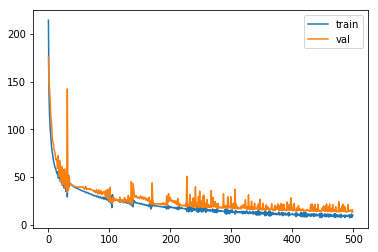

In [8]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()